# One leg PIP model 🦿 🎐

## Burocrazia
La maggior parte di queste librerie servono per fare il video in Colab

In [1]:
!pip install pybullet imageio-ffmpeg

import os
import time
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pybullet as p
import pybullet_data as pd
import cv2
import imageio_ffmpeg
from base64 import b64encode
from IPython.display import HTML


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 7.1 MB/s eta 0:00:00


## Getting model 🦭 📡

In [2]:
!git clone https://github.com/Gaianeve/Real_Mega_Fufi.git
%cd Real_Mega_Fufi/Robot/1LegTrail/

Cloning into 'Real_Mega_Fufi'...
remote: Enumerating objects: 980, done.
remote: Counting objects: 100% (423/423), done.
remote: Compressing objects: 100% (244/244), done.
remote: Total 980 (delta 333), reused 244 (delta 178), pack-reused 557 (from 1)
Receiving objects: 100% (980/980), 8.83 MiB | 12.85 MiB/s, done.
Resolving deltas: 100% (646/646), done.
/content/Real_Mega_Fufi/Robot/1LegTrail


## Pybullet set up 🔖 📚 🐨

In [3]:
#connecting
p.connect(p.DIRECT)

# using FEM
p.resetSimulation(p.RESET_USE_DEFORMABLE_WORLD)
#set sampling time
p.setGravity(0, 0, -9.81)
# set sampling time
p.setTimeStep(0.01)


# Aggiungi il percorso dei dati PyBullet for the plane
p.setAdditionalSearchPath(pd.getDataPath())


## Importing objects and chaning visual shape 🏮 🍀

Importing plane and fix it on the ground

In [4]:
useFixedBase_flag = True
plane_pos = [0,0,0]
plane = p.loadURDF("plane.urdf", plane_pos, useFixedBase=useFixedBase_flag)

Importing joint. It's a .obj file, so be sure to look at the important note in this notebook [here](https://colab.research.google.com/github/Gaianeve/Real_Mega_Fufi/blob/main/Robot/1LegTrail/See_model.ipynb?hl=it#scrollTo=cY6oVd0Um4e_)

In [5]:
elastic_joint_id = p.loadSoftBody("single_elastic_joint.obj", \
                                  mass=0.0569, \
                                  useNeoHookean=1, \
                                  NeoHookeanMu=76.92,\
                                  NeoHookeanLambda=115.38, \
                                  NeoHookeanDamping=0.01,\
                                  collisionMargin=0.005,\
                                  useSelfCollision=0,\
                                  frictionCoeff=0.5)
#arancione
p.changeVisualShape(elastic_joint_id, -1, rgbaColor=[1, 0.65, 0, 1])

Importing column and leg. See the same notebook as before for details on positions.

In [6]:
#get column
joint_x, joint_y, joint_z = p.getBasePositionAndOrientation(elastic_joint_id)[0]
column_position = [joint_x, joint_y, 0.1]
column_orientation = p.getQuaternionFromEuler([0,0,0])

column_id = p.loadURDF("pippa_oneleg_column.urdf", \
                       basePosition = column_position, \
                       baseOrientation =column_orientation , \
                       useFixedBase= useFixedBase_flag)
# verdino
p.changeVisualShape(column_id, -1, rgbaColor=[0.5, 1, 0.5, 1])

#get leg
leg_position = [joint_x,joint_y,0.6175]
leg_orientation = p.getQuaternionFromEuler([0,0,0])
leg_id = p.loadURDF("pippa_oneleg_leg.urdf", \
                       basePosition = leg_position, \
                       baseOrientation = leg_orientation,\
                       useFixedBase = useFixedBase_flag )
# azzurrino
p.changeVisualShape(leg_id, -1, rgbaColor=[0.5, 0.8, 1, 1])


## Changing materials 🤘

In [7]:
# AL 6082 (Alluminio)
lateralFriction_Al = 0.3
restitution_Al = 0.2
rollingFriction_Al = 0.001
spinningFriction_Al = 0.01
linearDamping_Al = 0.04
angularDamping_Al = 0.1
contactStiffness_Al = 3e6
contactDamping_Al = 800

# AISI 304 (Acciaio Inox)
lateralFriction_AISI = 0.4
restitution_AISI = 0.1
rollingFriction_AISI = 0.001
spinningFriction_AISI= 0.05
linearDamping_AISI = 0.03
angularDamping_AISI = 0.1
contactStiffness_AISI = 8e6
contactDamping_AISI = 1500

# Acciaio Maraging (Maragià per gli amici)
lateralFriction_Mar = 0.3
restitution_Mar = 0.2
rollingFriction_Mar = 0.001
spinningFriction_Mar = 0.02
linearDamping_Mar = 0.04
angularDamping_Mar = 0.15
contactStiffness_Mar = 3e6
contactDamping_Mar = 800

In [8]:
# Al
p.changeDynamics(leg_id, -1, lateralFriction=lateralFriction_Al,\
                  restitution=restitution_Al, \
                  spinningFriction= spinningFriction_Al, rollingFriction= rollingFriction_Al,\
                  linearDamping=linearDamping_Al, angularDamping=angularDamping_Al,\
                  contactStiffness = contactStiffness_Al,contactDamping = contactDamping_Al)
# AISI 304

p.changeDynamics(column_id, -1, lateralFriction=lateralFriction_AISI,\
                  restitution=restitution_AISI, \
                  spinningFriction= spinningFriction_AISI, rollingFriction= rollingFriction_AISI,\
                  linearDamping=linearDamping_AISI, angularDamping=angularDamping_AISI,\
                  contactStiffness = contactStiffness_AISI, contactDamping = contactDamping_AISI)
#Maragià
p.changeDynamics(elastic_joint_id, -1, lateralFriction=lateralFriction_Mar,\
                  restitution=restitution_Mar, \
                  spinningFriction= spinningFriction_Mar, rollingFriction= rollingFriction_Mar,\
                  linearDamping=linearDamping_Mar, angularDamping=angularDamping_Mar,\
                  contactStiffness = contactStiffness_Mar, contactDamping = contactDamping_Mar)


## Anchoring ⚓ 🦋
See same notebook for details and functions sintax. Keep in mind that these function are not well documented on pybullet start guide!

In [9]:
# Recupera le posizioni dei nodi del soft body
mesh_data = p.getMeshData(elastic_joint_id, flags=p.MESH_DATA_SIMULATION_MESH)

# Check se i dati della mesh sono disponibili
if mesh_data:
    num_nodes = mesh_data[0]  # Numero di nodi
    node_positions = mesh_data[1]  # Posizioni dei nodi

    # Trova il valore medio della coordinata z per separare i nodi superiori e inferiori
    z_values = [pos[2] for pos in node_positions]
    print(f'z_values', z_values)
    threshold_z = (min(z_values) + max(z_values)) / 2  # Soglia centrale
    print(f'threshold_z', threshold_z)

    # Ancoraggio dei nodi
    for node_index, node_pos in enumerate(node_positions):
        if node_pos[2] >= threshold_z:
            # Nodo superiore: ancora alla gamba
            p.createSoftBodyAnchor(elastic_joint_id, node_index, leg_id, -1)
        else:
            # Nodo inferiore: ancora alla colonna
            p.createSoftBodyAnchor(elastic_joint_id, node_index, column_id, -1)
else:
    print("Errore: I dati della mesh non sono stati recuperati correttamente.")


z_values [0.20000000298023224, 0.2800000011920929, 0.20000000298023224, 0.2800000011920929, 0.20000000298023224, 0.2800000011920929, 0.20000000298023224, 0.2800000011920929, 0.20000000298023224, 0.2800000011920929, 0.20000000298023224, 0.2800000011920929, 0.20000000298023224, 0.2800000011920929, 0.20000000298023224, 0.2800000011920929, 0.20000000298023224, 0.2800000011920929, 0.20000000298023224, 0.2800000011920929, 0.20000000298023224, 0.2800000011920929, 0.20000000298023224, 0.2800000011920929, 0.20000000298023224, 0.2800000011920929, 0.20000000298023224, 0.2800000011920929, 0.20000000298023224, 0.2800000011920929, 0.20000000298023224, 0.2800000011920929, 0.20000000298023224, 0.2800000011920929, 0.20000000298023224, 0.2800000011920929, 0.20000000298023224, 0.2800000011920929, 0.20000000298023224, 0.2800000011920929, 0.20000000298023224, 0.2800000011920929, 0.20000000298023224, 0.2800000011920929, 0.20000000298023224, 0.2800000011920929, 0.20000000298023224, 0.2800000011920929, 0.2000

## Video set up 🏔 🎥

In [10]:

# Parametri della fotocamera
cam_target_pos = [0, 0, 0]
cam_distance = 2.0
cam_yaw, cam_pitch, cam_roll = 50, -30.0, 0
cam_width, cam_height = 480, 360
cam_up_axis_idx = 2
cam_fov = 60
cam_near_plane, cam_far_plane = 0.01, 100

# Imposta la registrazione del video
vid = imageio_ffmpeg.write_frames('simulation_output.mp4', (cam_width, cam_height), fps=30)
vid.send(None)  # Inizializza con un fotogramma vuoto

# Parametri per la simulazione
simulation_time = 180
sampling_frequency = 1 / 100
num_points = int(simulation_time * sampling_frequency)

# Liste per registrare le posizioni
leg_positions_x, leg_positions_y, leg_position_z = [], [], []

# Forza esterna da applicare
force_module = np.array([500, 0, 0])
force_position = np.array([0, 0, 0.05])  # Posizione dove applicare la forza
p.stepSimulation()

()

## Start simulation 🥠 🏃

In [ ]:
# Ciclo principale della simulazione
for step in range(1000):
    print(f'\rtimestep {step}...', end='')
    if step == 50:
      # Applicare la forza esterna al primo passo della simulazione
      p.applyExternalForce(
          objectUniqueId= column_id,
          linkIndex=-1,
          forceObj=force_module,
          posObj=force_position,
          flags=p.WORLD_FRAME
      )

    # Registrazione della posizione della gamba
    leg_position, leg_orientation = p.getBasePositionAndOrientation(leg_id)
    leg_positions_x.append(leg_position[0])
    leg_positions_y.append(leg_position[1])
    leg_position_z.append(leg_position[2])

    # Calcola la vista e la proiezione della fotocamera
    cam_view_matrix = p.computeViewMatrixFromYawPitchRoll(
        cam_target_pos, cam_distance, cam_yaw, cam_pitch, cam_roll, cam_up_axis_idx
    )
    cam_projection_matrix = p.computeProjectionMatrixFOV(
        cam_fov, cam_width / cam_height, cam_near_plane, cam_far_plane
    )

    # Cattura l'immagine
    image = p.getCameraImage(cam_width, cam_height, cam_view_matrix, cam_projection_matrix)[2][:, :, :3]

    # Scrivi il fotogramma nel video
    vid.send(np.ascontiguousarray(image))

    p.stepSimulation()  # Avanza di un passo nella simulazione

# Rilascia le risorse video
vid.close()

# Disconnessione dalla simulazione
#p.disconnect()

timestep 21...

In [ ]:
# Leggi il file video
mp4 = open('simulation_output.mp4', 'rb').read()

# Convertilo in Base64
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

# Visualizza il video nel notebook Jupyter
HTML(f'<video width="600" controls><source src="{data_url}" type="video/mp4"></video>')

## Data analysis 🧿 🪖

### Plotting positions in time

In [ ]:

#plotting positions
plt.figure('Leg positions')
plt.plot(leg_positions_x, label='x')
plt.plot(leg_positions_y, label='y')
plt.plot(leg_position_z, label='z')
plt.legend()
plt.grid()
plt.minorticks_on()
#plt.ylim(-0.000001,0.0001)
#plt.xlim(45, 1000)
plt.show()

### See where force is applied

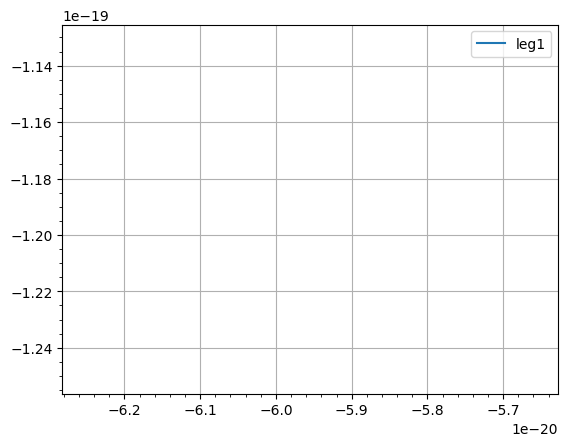

In [15]:
plt.figure('xy motion')
plt.plot(leg_positions_x, leg_positions_y, label = 'leg1')
plt.legend()
plt.grid()
plt.minorticks_on()
plt.show()

### See tau of exponential decay

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

# Supponiamo che leg_positions_x sia un array definito
time = np.arange(len(leg_positions_x[45:-1]))  # Array di tempi in base agli indici
y_data = leg_positions_x[45:-1]  # Dati del segnale (senza valore assoluto)

# Trova i massimi locali usando find_peaks
peaks, _ = find_peaks(y_data)  # Restituisce gli indici dei picchi e altre informazioni

peak_values = []
time_peaks = []
# Estrai i valori dei massimi locali per creare l'inviluppo
for value in peaks:
    peak_values.append(y_data[value])
    time_peaks.append(time[value])

# Definisci la funzione esponenziale da adattare
def exp_decay(t, A, tau):
    return A * np.exp(-t / tau)

# Esegui il fit esponenziale sui massimi
params, covariance = curve_fit(exp_decay, time_peaks, peak_values, p0=(peak_values[0], 100))

# Estrai il parametro tau
A_fit, tau_fit = params
print(f"Stima di tau: {tau_fit}")

# Visualizza i risultati
plt.figure(figsize=(10, 6))
plt.plot(time, y_data, 'b-', label='Dati originali')
plt.plot(time[peaks], peak_values, 'go', label='Massimi locali (inviluppo)')
plt.plot(time, exp_decay(time, *params), 'r--', label=f'Fit esponenziale (tau = {tau_fit:.3f})')
plt.xlabel('Tempo')
plt.ylabel('Ampiezza')
plt.legend()
plt.title('Fit esponenziale dell\'inviluppo (massimi locali)')
plt.show()

IndexError: list index out of range